# Applications of Agent-Based Simulations

## Introduction

In this module, we will examine various applications of agent-based simulations and analyze a simulation to explore how traffic jams are formed.

Agent-based simulations allow testing different changes to the agents, scenarios, and conditions of a system. In the case of transportation systems, it is possible to study changes to the roads, drivers, traffic laws, and roadblocks, for example. Depending on the objective of a study, these changes can then be quantified in terms of CO2 emissions, transportation time, number of accidents, maximum number of vehicles, etc.

In preparation for the interaction part, please read the following Wikipedia entry about one of the longest traffic jams ever recorded.

https://en.wikipedia.org/wiki/China_National_Highway_110_traffic_jam

## Concepts

Below you will find a list of important concepts we will review in the module.

- Assumptions
- Traffic jams
- Transportation systems
- Random noise
- Simplifications (TODO?)
- Limitations (TODO???)
- 

## Interaction

There are many applications of agent-based simulations.

- Spread of infectious diseases
- Behaviour of economic systems
- Behaviour of transportation systems

### Traffic Jams

In this interaction, we will analyze an agent-based simulation  

The objective of the simulation is to 

Test if traffic jams can emerge from normal conditions.

In the previous modules, the agents were ocupied one discrete square in a a 1D (array) or 2D grid (checkboard). In this modules 

Until now in the course, the our agents have functioned in 1D or 2D grid spaces, but we can make use of other structures like networks, ... TODO. The simulation below assumes cars move in a continuous one-dimensional circular space 

The class Driver defines the operation of the agent. 

The agent Driver operates in an object named Highway. The Highway is a .... and has a circular shape. In the simulation, the number of drivers doesn't change.


The driver only needs to determine its acceleration. The maximum acceleration is 1 and the minimum is -10.

Random noice is added to the vehicle speed. This noice represents the imperfection in the conditions (distracted driver, mechanical problems, etc.) A random noise of..... 

Limitations

- Single line highway.
- Vehicles can't be passed.
- Vehicles can only go forward.
- Vehicles have a maximum speed of 40 miles/hr (64.37 km/hr).
- Vehicles start equally spaced.
- Drivers will have slight different speeds because of the random noise.
- Collisions (indicated with a triangle in the simulation) cause vehicles to stop.

Squares indicate the position of the drivers.
Triangles indicate the places where one driver has to break to avoid a collision.

- Driver accelerate to the maximum rate. THIS IS NOT CORRECT

The code below simulates highway. The code is based on 

Instructions

- Simulate the system assuming a low number of vehicles (<=10 vehicles) and no random noise (eps = 0) and document your findings.
- Simulate the system assuming a intermediate number of vehicles (<=25 vehicles) and a low random noise (eps = 0.02) and document your findings.

To confirm. Acceleration is speed plus a certain amount.


Chooses acceleration based on distance. TODO 
        
        dist: distance from the car in front
        
        returns: acceleration


In [ ]:
Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [115]:
import matplotlib.pyplot as plt
import numpy as np
from utils import decorate, savefig
import pandas as pd

In [237]:
class Driver:
    
    def __init__(self, loc, driver_id, speed=4):
        """Initialize the attributes.
        
        loc: position on track, in miles
        speed: speed in miles per hour. Initial speed 4 miles/hour.
        """
        self.start = loc
        self.loc = loc 
        self.speed = speed
        self.driver_id = driver_id
        
    def choose_acceleration(self, dist):
        """Increases speed by 1 mile/hr
        """
        return (1)
    
    def read_driver_id(self):
        return self.driver_id
    
    def set_odometer(self):
        self.start = self.loc
        
    def read_odometer(self):
        return self.loc - self.start
    
    def read_speedometer(self):
        return self.speed

In [238]:
from Cell2D import Cell2D

class Highway(Cell2D):
    
    max_acc = 1
    min_acc = -10
    speed_limit = 40
    driver_id_log = []
    location_log = []
    speed_log = []
    crash_log = []
    
    def __init__(self, n=10, length=1000, eps=0, constructor=Driver):
        """Initializes the attributes.
        
        n: number of drivers
        length: length of the track
        eps: variability in speed
        constructor: function used to instantiate drivers
        """
        self.length = length
        self.eps = eps
        self.crashes = 0

        # create the drivers
        locs = np.linspace(0, length, n, endpoint=False) # Returns evenly spaced numbers over a specified interval.
         
        self.drivers = []
        driver_id = 0
        for loc in locs:
            self.drivers.append(constructor(loc,driver_id))
            driver_id += 1    
    
        # and link them up
        for i in range(n):
            j = (i+1) % n
            self.drivers[i].next = self.drivers[j]
            
    def step(self):
        """Performs one time step."""
        for driver in self.drivers:
            self.move(driver)
            
            
    def move(self, driver):
        """Updates `driver`.
        
        driver: Driver object
        """
        dist = self.distance(driver) # gets the distance to the next driver
        acc = driver.choose_acceleration(dist) # let the driver choose acceleration
        acc = min(acc, self.max_acc)
        acc = max(acc, self.min_acc)
        #print ('acc',acc)
        speed = driver.speed + acc
        
        # add random noise to speed
        speed *= np.random.uniform(1-self.eps, 1+self.eps)
        
        # keep it nonnegative and under the speed limit
        speed = max(speed, 0)
        speed = min(speed, self.speed_limit)
        
        # if current speed would collide with next driver, stop
        crash = 0
        if speed > dist:
            speed = 0
            crash = 1
            self.crashes += 1
        
        # update speed and loc
        driver.speed = speed
        driver.loc += speed
        
        #print (speed)
    
        self.driver_id_log.append(driver.driver_id)
        self.location_log.append(driver.loc)
        self.speed_log.append(driver.speed)
        self.crash_log.append(crash)
            
    def distance(self, driver):
        """Distance from `driver` to next driver.
        
        driver: Driver object
        """
        dist = driver.next.loc - driver.loc
        # fix wraparound
        if dist < 0:
            dist += self.length
        
        return dist
    
    def set_odometers(self):
        return [driver.set_odometer()
                for driver in self.drivers] 
    
    def read_odometers(self):
        return np.mean([driver.read_odometer()
                        for driver in self.drivers])
    
    def draw(self):
        """Draws the drivers and shows collisions.
        """
        drivers = self.drivers
        xs, ys = self.get_coords(drivers)
        plt.plot(xs, ys, 'bs', markersize=10, alpha=0.7)
        
        stopped = [driver for driver in self.drivers 
                  if driver.speed==0]
        xs, ys = self.get_coords(stopped, r=0.8)
        plt.plot(xs, ys, 'r^', markersize=12, alpha=0.7)
        
        plt.axis('off')
        plt.axis('equal')
        plt.xlim([-1.05, 1.05])
        plt.ylim([-1.05, 1.05])

    def get_coords(self, drivers, r=1):
        """Gets the coordinates of the drivers.
        
        Transforms from (row, col) to (x, y).
        
        drivers: sequence of Driver
        r: radius of the circle
        
        returns: tuple of sequences, (xs, ys)
        """
        locs = np.array([driver.loc for driver in drivers])
        locs *= 2 * np.pi / self.length
        xs = r * np.cos(locs)
        ys = r * np.sin(locs)
        return xs, ys
    
    def export_log(self):
        log = {
            'Driver_ID':self.driver_id_log,
            'Speed' :self.speed_log,
            'Location':self.location_log,
            'Crash':self.crash_log,}
        df = pd.DataFrame(log)
        df.to_excel('log.xlsx', index=True, header=True)

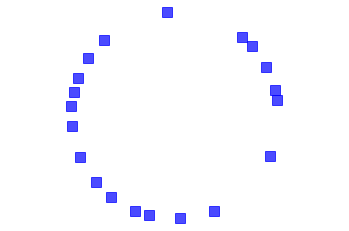

In [239]:
# Run the simulation
highway = Highway(20, eps=0.02) # The first parameter is the number of drivers; the second is the amount of random noise.
# Make the animation
highway.animate(frames=100, interval=0.2)

In [240]:
highway.export_log()

And generate the figure:

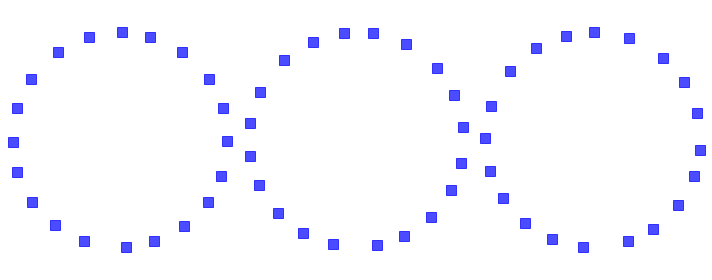

In [241]:
from utils import three_frame

highway = Highway(20, eps=0.02)
three_frame(highway, [16, 1, 1], seed=22)

Explore the relationship between `eps` and average speed.

In [242]:
def run_simulation(eps, constructor=Driver, iters=100):
    res = []
    for n in range(5, 100, 5):
        highway = Highway(n, eps=eps, constructor=constructor)
        for i in range(iters):
            highway.step()

        highway.set_odometers()
        for i in range(iters):
            highway.step()

        res.append((n, highway.read_odometers() / iters))
    
    return np.transpose(res)

Generate the figure:

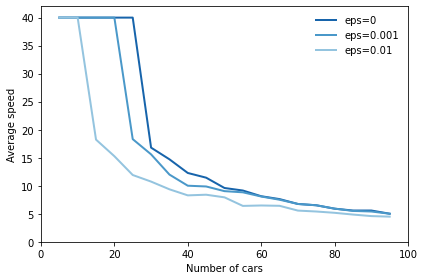

In [243]:
np.random.seed(20)
from utils import set_palette
set_palette('Blues', 4, reverse=True)

for eps in [0.0, 0.001, 0.01]:
    xs, ys = run_simulation(eps)
    plt.plot(xs, ys, label='eps=%g' % eps)
    
decorate(xlabel='Number of cars',
                 ylabel='Average speed',
                 xlim=[0, 100], ylim=[0, 42])

**Exercise:** In the traffic jam simulation, define a class, `BetterDriver`,
that inherits from `Driver` and overrides `choose_acceleration`.
See if you can define driving rules that do better than the basic
implementation in `Driver`.  You might try to achieve higher
average speed, or a lower number of collisions.

Here's a first attempt:

In [294]:
class BetterDriver(Driver):
    
    def choose_acceleration(self, d):
        #print (d)
        if (self.speed * 2 > d):
            acceleration = .5
        else:
            if (self.speed > d):
                acceleration = -1
            else:
                acceleration = 1
        return (acceleration)

In [295]:
class BetterDriver2(Driver):
    
    def choose_acceleration(self, d):
        if self.speed < 20:
            return 1
        else:
            return 0

In [292]:
class BetterDriver3(Driver):
    
    def choose_acceleration(self, d):
        if self.speed < 30:
            return 1
        else:
            return 0

In [313]:
class BetterDriver3(Driver):

    def choose_acceleration(self, d):
        return (0)

The following loop runs simulations with `Driver` and `BetterDriver`, and plots average speed as a function of the number of cars.

And it prints the area under the curves as one way (but certainly not the only way) to quantify the effect of driving behavior on average speed over the range of densities.

Driver 1512.925
BetterDriver 1164.8161629593103
BetterDriver2 1238.725
BetterDriver3 360.0


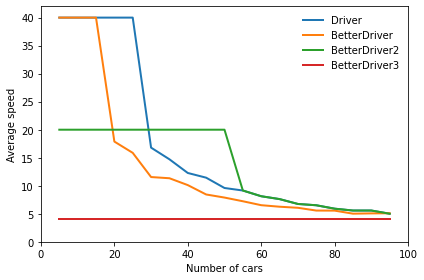

In [314]:
from scipy.integrate import trapezoid

for constructor in [Driver, BetterDriver,BetterDriver2,BetterDriver3]:
    xs, ys = run_simulation(eps=0.0, constructor=constructor)
    plt.plot(xs, ys, label=constructor.__name__)
    print(constructor.__name__, trapezoid(ys, xs))
    
decorate(xlabel='Number of cars',
                 ylabel='Average speed',
                 xlim=[0, 100], ylim=[0, 42])

`BetterDriver` is a little better in the sense that it keeps traffic moving smoothly at medium densities. However:

* At high densities, it has almost no effect, and

* At low densities, it is substantially worse.

As a result, the total are under the curve is much less.

See if you can write rules for the agents that maximize the area under the curve.

In [11]:

Add and remove drivers. Duration of the drivers in the highway.
You could simulate a linear highway with some roadblocks.

Find three applications of agent-based simulations documented in the research literature that are relevant to your current job. 
Use Google Scholar (https://scholar.google.com/) and the McGill Library (https://www.mcgill.ca/library/) to find the relevant sources. Read the abstracts and briefly describe the applications.
Select one of the three applications and explore it in more detail. Reference the consulted sources using APA.

What the assumptions or considerations? What limitations? What tools did they use to build the simulation?
Personal opinion on the application.

Explore creating a worst driver.

Add a method to visualize the number of collisions.

SyntaxError: invalid syntax (<ipython-input-11-632afc83e0bb>, line 1)

## Recommended Readings

Once you have completed the interaction portion of the module, please read the following recommended reading.

- Bernhardt, K., (2007). Agent-Based Modeling in Transportation. Transportation Research Circular, E-C113, 72-80. https://www.trb.org/Publications/Blurbs/158428.aspx

## Optional Readings

Below you will find additional resources in case you would like to continue exploring the topics covered in this module.

- Explore a different approach to constructing Conway's game of life.
    - Chapter 10 - Herds, Flocks, and Traffic Jams. Downey, A. (2018). Think complexity: Complexity science and computational modeling (Second). O’Reilly Media. https://mcgill.on.worldcat.org/oclc/1043913738